# **Pendigits Dataset**
The Pendigits Dataset is designed for handwritten digit recognition tasks, offering a robust and diverse collection of pen-based digit samples. This dataset is widely used for machine learning projects, especially in classification tasks, as it provides a solid foundation for building and evaluating handwriting recognition systems

---

### **Dataset Details**
* Total Samples: 10,992
* Features: 16 features representing pen-tip (x, y) coordinates during digit writing.
* Classes: 10 target classes (digits 0-9).
* Format: Each row represents a single handwritten digit, with 16 feature values and a target class.



# **Visualize The Data**
We want to first understand what the data is and so we will be using matplot lib to graph the coordinates and visualize the data values

   input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1  
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ..

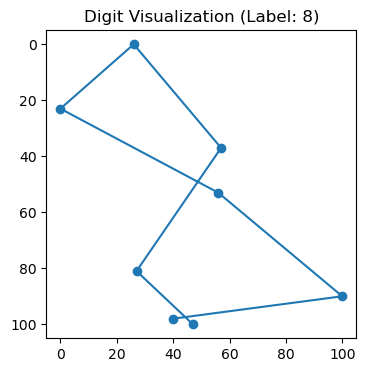

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Make Sure it is in the Right Place
# Copy Path and Paste it here
df = pd.read_csv("/Users/andrewxue/Documents/PenDigitsNN/pendigits_txt.csv")

# Display the first few rows
print(df.head())

# Extract first data point (assuming features are in first 16 columns)
first_point = df.iloc[0, :-1].values  # Exclude the last column (label)

# X Y coordinates are as follows [X, Y, X, Y ...]
# We can slice the array into X's and Y's using step by 2
x = first_point[::2]  # X-coordinates
y = first_point[1::2]  # Y-coordinates

# Plot the digit
plt.figure(figsize=(4, 4))
plt.plot(x, y, marker='o', linestyle='-')
plt.gca().invert_yaxis()  # Invert Y-axis to match drawing convention
plt.title(f"Digit Visualization (Label: {df.iloc[0, -1]})")
plt.show()

# **Neural Network Architecture**

This is the basic architecture of the neural network for multi-class classification (e.g., recognizing digits 0–9).

---

## **1. Input Layer**
- **Purpose:** Accepts the input features ($x_1, x_2, \dots, x_n$).
- **Number of Nodes:** Equal to the number of features in the dataset ($n$).
- **Example:** For digit recognition, $n$ could represent pixel values from an image.

---

## **2. Fully Connected Layer**
- **Purpose:** Connects every input node to each output node with unique weights ($w_{ij}$).
- **Computation:** For each output node $j$, the weighted sum of inputs is calculated:
  $$
  y_j = \sum_{i=1}^n w_{ij} x_i + b_j
  $$
  Where:
  - $w_{ij}$: Weight connecting input $x_i$ to output $j$.
  - $b_j$: Bias term for output $j$.

---

## **3. Activation Function**
- **Purpose:** Applies the softmax function to the output of the summation layer to produce probabilities for each class.
- **Softmax Function:**
  $$
  z_j = \frac{e^{y_j}}{\sum_{k=1}^{C} e^{y_k}}
  $$
  Where:
  - $z_j$: Probability for class $j$.
  - $C$: Total number of classes (e.g., $C = 10$ for digits 0–9).
- **Output:** Probabilities for all classes, summing to 1.

---

## **4. Output Layer**
- **Purpose:** Represents the predicted class probabilities.
- **Number of Nodes:** Equal to the number of classes ($C$).
- **Example:**
  - For digit recognition, there are 10 nodes (one for each digit: 0–9).
  - The node with the highest probability corresponds to the predicted class.

---

## **Architecture Summary**
1. **Input Layer:**
   - Number of nodes: $n$ (features in the dataset).
2. **Fully Connected Layer:**
   - Each input node connects to every output node.
3. **Activation Function:**
   - Softmax applied to output for probability distribution.
4. **Output Layer:**
   - Number of nodes: $C$ (number of classes).

---

## **Workflow**
1. Input data ($x_1, x_2, \dots, x_n$) is fed into the input layer.
2. Weighted sums ($y_j$) are calculated in the fully connected layer.
3. Softmax activation converts these sums into probabilities ($z_j$).
4. The class with the highest probability is selected as the prediction.

---

This architecture ensures the network can classify the input into one of the $C$ classes (e.g., digits 0–9).


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.utils import to_categorical
import os
from tensorflow import keras
import tensorflowjs as tfjs
import json

# Load and prepare the data
def load_data(filepath):
    # Read the CSV file
    df = pd.read_csv(filepath)
    
    # Separate features and target
    X = df.iloc[:, :-1].values  # All columns except last <- Original Array - Last Column
    y = df.iloc[:, -1].values   # Last column is the class <- Last Column
    
    # Convert labels to one-hot encoding
    # Digit 0 → [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    # Each Class has its own Dimension, also ensures numerical value has no meaning
    # Easier to work with softmax 
    y = to_categorical(y)
    
    # Split the data, 20% with seed 42 for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    # Calculate and scale for train
    X_train = scaler.fit_transform(X_train)
    # Use same calculated mean on training for testing data
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, scaler

def create_model(input_shape, num_classes):
    model = Sequential([
        # Input layer
        InputLayer(input_shape=input_shape, name='input_layer'),

        # Hidden layers
        Dense(256, activation='relu'),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.2),
        
        # Output layer
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def train_model(model, X_train, y_train, X_test, y_test):
    # Define early stopping callback
    # Patience = 10, waits 10 epochcs
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
    )
    
    return history

def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    return y_pred_classes, y_test_classes

def save_model_for_tfjs(model, save_path='./tfjs_model'):
    """
    Save the trained model in TensorFlow.js format
    """
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)

    # Save weights
    weights_path = os.path.join(save_path, 'model.weights.h5')
    model.save_weights(weights_path)
    
    # Convert to TensorFlow.js format
    tfjs.converters.save_keras_model(model, save_path)
    
    print(f"Model saved in TensorFlow.js format at: {save_path}")

    model.save('my_model.keras')

def save_scaler(scaler, filepath='scaler.json'):
    scaler_params = {
        'mean': scaler.mean_.tolist(),
        'scale': scaler.scale_.tolist()
    }
    with open(filepath, 'w') as f:
        json.dump(scaler_params, f)
    print(f"Scaler parameters saved to {filepath}")

def main():
    # Load and prepare data
    X_train, X_test, y_train, y_test, scaler = load_data('pendigits_txt.csv')
    
    # Create model with explicit input shape
    input_shape = (16,)  # Fixed input shape for 8 points (x,y)
    num_classes = 10     # 10 digits (0-9)
    
    print(f"Creating model with input shape: {input_shape}")
    model = create_model(input_shape=input_shape, num_classes=num_classes)
    
    # Print model summary to verify architecture
    model.summary()

    # Train model
    history = train_model(model, X_train, y_train, X_test, y_test)
    
    # Evaluate model
    y_pred_classes, y_test_classes = evaluate_model(model, X_test, y_test)

    # Save Model
    save_model_for_tfjs(model)

    # After fitting the scaler
    save_scaler(scaler)
    
    return model , history

if __name__ == "__main__":
    model, history = main()

Creating model with input shape: (16,)


/Users/andrewxue/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 256)            │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,914 (187.16 KB)

 Trainable params: 47,914 (187.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3733 - loss: 1.8108 - val_accuracy: 0.9036 - val_loss: 0.3357
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.5084 - val_accuracy: 0.9591 - val_loss: 0.1442
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.2999 - val_accuracy: 0.9745 - val_loss: 0.0859
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9427 - loss: 0.2053 - val_accuracy: 0.9832 - val_loss: 0.0644
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.1824 - val_accuracy: 0.9841 - val_loss: 0.0616
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1360 - val_accuracy: 0.9877 - val_loss: 0.0482
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.1090 - val_accuracy: 0.9877 - val_loss: 0.0443
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.1066 - val_accuracy: 0.9891 - v

failed to lookup keras version from the file,
    this is likely a weight only file
Model saved in TensorFlow.js format at: ./tfjs_model
Scaler parameters saved to scaler.json
